In [18]:
def getDis(x1,y1,z1,x2,y2,z2):
    return np.sqrt((x1-x2)**2+(y1-y2)**2+(z1-z2)**2)

def V(coords,qs):
    x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4=coords.flatten()
    q1,q2,q3,q4=qs.flatten()
    r1,r2,r3,r4=getDis(x1,y1,z1,0,0,0),getDis(x2,y2,z2,0,0,0),getDis(x3,y3,z3,0,0,0),getDis(x4,y4,z4,0,0,0)
    r12,r13,r14,r23,r24,r34=getDis(x1,y1,z1,x2,y2,z2),getDis(x1,y1,z1,x3,y3,z3),getDis(x1,y1,z1,x4,y4,z4),getDis(x3,y3,z3,x2,y2,z2),getDis(x4,y4,z4,x2,y2,z2),getDis(x4,y4,z4,x3,y3,z3)
    elec = q1*q2/(r12) + q1*q3/(r12) + q1*q4/(r14) + q2*q3/(r23) + q2*q4/(r24) + q3*q4/(r34)
    bd = 16*((1/r1)**12 - (1/r1)**6 + (1/r2)**12 - (1/r2)**6 +(1/r3)**12 - (1/r3)**6 + (1/r4)**12 - (1/r4)**6)
    return elec+bd
    
def der(coords,derStep,qs):
    ders=[]
    for i in range(0,coords.shape[0]):
        temp=np.copy(coords)
        temp[i][0]+=derStep
        deri=(V(temp,qs)-V(coords,qs))/derStep
        ders.append(deri)
    return np.array(ders).reshape(coords.shape[0],1)

def runGradDesc(coords,qs,derStep=0.001,step=0.1,maxiter=1000):
    Vi=V(coords,qs)
    flag=0
    for i in range(0,maxiter):
        coords=coords-(der(coords,derStep,qs)*step)
        Vf=V(coords,qs)
        if(Vf>=0.999*Vi and Vf<=1.001*Vi):
            print("Optimized")
            flag=1
    if(flag==0):
        print("Didn't Optimize")
    return coords

Didn't Optimize


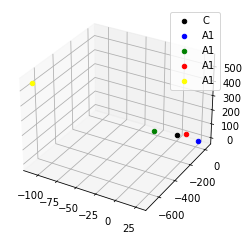

In [19]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

charges={'A1':4., 'A2':0., 'A3':0., 'A4':0., 'A5':0., 'A6':0.}
st=input("Enter acid name separated by spaces").split(" ")
qs=[]
for i in st:
    qs.append(charges[i])
qs=np.array(qs)
coordsInit=np.array([
    1,0,-1/np.sqrt(2),
    -1,0,-1/np.sqrt(2),
    0,1,1/np.sqrt(2),
    0,-1,1/np.sqrt(2)]).reshape(12,1)
coords=runGradDesc(coordsInit,qs,0.001,0.1,10000)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4=coords.flatten()
ax.scatter(0,0,0,color="black",label="C")
ax.scatter(x1,y1,z1,color="blue",label=st[0])
ax.scatter(x2,y2,z2,color="green",label=st[1])
ax.scatter(x3,y3,z3,color="red",label=st[2])
ax.scatter(x4,y4,z4,color="yellow",label=st[3])
plt.legend()
plt.show()

In [20]:
x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4

(27.341065544746883,
 11.794127071509998,
 -1.7056653025291548,
 -28.095821781663567,
 -14.870932838542906,
 -4.661126569640976,
 9.746500184931062,
 25.166405460560952,
 13.02717309842862,
 -109.0959091061961,
 -702.2301999422898,
 543.1924805495802)